從 chap09.ipynb 轉換而來
使用 ipynb_to_py.py 腳本自動轉換

你可以從以下網站訂購《Think Python 3e》的紙本版和電子書：
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [1]:
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("已下載 " + str(local)) # 把下載訊息也中文化
    return filename

In [3]:
download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

In [4]:
import thinkpython

# 列表 (Lists)

這一章要介紹 Python 最有用的內建型別之一：列表 (list)。
你也會學到更多關於物件 (object) 的知識，以及當多個變數指向同一個物件時會發生什麼事。

在本章末尾的練習中，我們會建立一個單字列表，並用它來搜尋像回文 (palindrome) 和相同字母異序詞 (anagram) 這類的特殊單字。

## 列表是一個序列 (A list is a sequence)

跟字串一樣，**列表 (list)** 也是一個值的序列。在字串裡，值是字元；在列表裡，值可以是任何型別。
列表中的值被稱為 **元素 (elements)**。

建立新列表有好幾種方法；最簡單的就是把元素用方括號 (`[` 和 `]`) 包起來。
例如，這裡是一個包含兩個整數的列表。

In [5]:
numbers = [42, 123]

這裡則是一個包含三個字串的列表。

In [6]:
cheeses = ['Cheddar', 'Edam', 'Gouda'] # 起司種類，例如：切達起司、艾登起司、高達起司

列表的元素不必是相同的型別。
下面這個列表包含了一個字串、一個浮點數、一個整數，甚至還有另一個列表。

In [7]:
t = ['spam', 2.0, 5, [10, 20]] # 'spam' 是一個常用的範例字串

一個列表裡面又包含另一個列表，這種情況叫做 **巢狀的 (nested)**。

一個不包含任何元素的列表叫做空列表；你可以用空的方括號 `[]` 來建立它。

In [8]:
empty = []

`len` 函數會回傳列表的長度。

In [9]:
len(cheeses)

3

空列表的長度是 `0`。

In [10]:
len(empty)

0

下圖顯示了 `cheeses`、`numbers` 和 `empty` 的狀態圖。
(狀態圖是一種視覺化表示變數如何指向記憶體中物件的方式)

In [11]:
from diagram import make_list, Binding, Value

In [12]:
list1 = make_list(cheeses, dy=-0.3, offsetx=0.17)
binding1 = Binding(Value('cheeses'), list1)

In [13]:
list2 = make_list(numbers, dy=-0.3, offsetx=0.17)
binding2 = Binding(Value('numbers'), list2)

In [14]:
list3 = make_list(empty, dy=-0.3, offsetx=0.1)
binding3 = Binding(Value('empty'), list3)

In [15]:
from diagram import diagram, adjust, Bbox

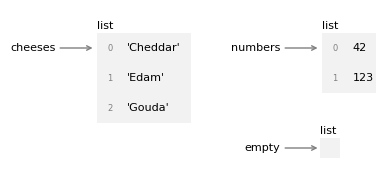

In [16]:
width, height, x, y = [3.66, 1.58, 0.45, 1.2]
ax = diagram(width, height)
bbox1 = binding1.draw(ax, x, y)
bbox2 = binding2.draw(ax, x+2.25, y)
bbox3 = binding3.draw(ax, x+2.25, y-1.0)

In [17]:
bbox = Bbox.union([bbox1, bbox2, bbox3])
#adjust(x, y, bbox)

列表用方框表示，方框外面寫著 "list"，裡面則是列表編號的元素。

## 列表是可變的 (Lists are mutable)

要讀取列表中的一個元素，我們可以用方括號運算子 `[]`。
第一個元素的索引是 `0`。

In [18]:
cheeses[0]

'Cheddar'

跟字串不一樣，列表是可變的 (mutable)。當方括號運算子出現在賦值運算子 `=` 的左邊時，
它會指出要被賦值的列表元素是哪一個。

In [19]:
numbers[1] = 17
numbers

[42, 17]

`numbers` 列表的第二個元素，原本是 `123`，現在變成 `17` 了。

列表索引的運作方式跟字串索引一樣：

-   任何整數表達式都可以當作索引。

-   如果你嘗試讀取或寫入一個不存在的元素，你會得到一個 `IndexError` (索引錯誤)。

-   如果索引是負數，它會從列表的尾巴倒著數回來。

`in` 運算子可以用在列表上 —— 它會檢查給定的元素是否出現在列表中的任何地方。

In [20]:
'Edam' in cheeses

True

In [21]:
'Wensleydale' in cheeses # 文斯利代爾起司，另一種起司

False

雖然一個列表可以包含另一個列表，但那個巢狀的列表仍然只算是一個元素
—— 所以在下面的列表裡，只有四個元素。

In [22]:
t = ['spam', 2.0, 5, [10, 20]]
len(t)

4

而且 `10` 不被認為是 `t` 的元素，因為它是巢狀列表的元素，而不是 `t` 本身的元素。

In [23]:
10 in t

False

## 列表切片 (List slices)

切片運算子 `[:]` 用在列表上的方式跟用在字串上一樣。
下面的例子從一個包含四個字母的列表中選取了第二個和第三個元素。

In [24]:
letters = ['a', 'b', 'c', 'd']
letters[1:3] # 選取索引 1 到索引 3 (不包含 3) 的元素

['b', 'c']

如果你省略第一個索引，切片會從列表的開頭開始。

In [25]:
letters[:2] # 選取從開頭到索引 2 (不包含 2) 的元素

['a', 'b']

如果你省略第二個索引，切片會一直到列表的結尾。

In [26]:
letters[2:] # 選取從索引 2 開始到結尾的所有元素

['c', 'd']

所以如果你兩個索引都省略，切片就會是整個列表的一個副本 (copy)。

In [27]:
letters[:]

['a', 'b', 'c', 'd']

複製列表的另一種方法是使用 `list()` 函數。

In [28]:
list(letters)

['a', 'b', 'c', 'd']

因為 `list` 是一個內建函數的名稱，所以你應該避免用它來當作變數名稱。
(不然你會把內建函數蓋掉，導致之後不能用！)

## 列表運算 (List operations)

`+` 運算子可以串接 (concatenate) 列表。

In [29]:
t1 = [1, 2]
t2 = [3, 4]
t1 + t2

[1, 2, 3, 4]

`*` 運算子可以將一個列表重複指定的次數。

In [30]:
['spam'] * 4

['spam', 'spam', 'spam', 'spam']

其他數學運算子不能用在列表上，但是內建函數 `sum` 可以把列表中的元素加總起來。
(前提是列表中的元素都是數字才能相加)

In [31]:
sum(t1)

3

而 `min` 和 `max` 函數可以找出最小和最大的元素。
(前提是列表中的元素可以互相比較大小)

In [32]:
min(t1)

1

In [33]:
max(t2)

4

## 列表方法 (List methods)

Python 提供了許多操作列表的方法 (method)。例如，`append` 方法
會在列表的尾巴加入一個新的元素：

In [34]:
letters.append('e')
letters

['a', 'b', 'c', 'd', 'e']

`extend` 方法會接收一個列表作為參數，並將該列表中的所有元素都附加到目前列表的尾巴：

In [42]:
letters.extend(['f', 'g'])
letters

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g', 'f', 'g']

有兩個方法可以從列表中移除元素。
如果你知道你想移除的元素的索引，你可以用 `pop` 方法。

In [43]:
t = ['a', 'b', 'c']
t.pop(1) # 移除索引為 1 的元素 (也就是 'b')

'b'

`pop` 方法的回傳值是被移除的那個元素。
我們可以確認列表已經被修改了。

In [44]:
t

['a', 'c']

如果你知道你想移除的元素的值 (但不知道它的索引)，你可以用 `remove` 方法：

In [45]:
t = ['a', 'b', 'c']
t.remove('b') # 移除第一個值為 'b' 的元素

`remove` 方法的回傳值是 `None` (表示沒有回傳任何有意義的值)。
但我們可以確認列表已經被修改了。

In [46]:
t

['a', 'c']

如果你要求移除的元素不在列表中，那就會發生 `ValueError` (值錯誤)。

In [48]:
%%expect ValueError

UsageError: %%expect is a cell magic, but the cell body is empty.


In [49]:
t.remove('d')

ValueError: list.remove(x): x not in list

## 列表和字串 (Lists and strings)

字串是一個字元的序列，而列表是一個值的序列，
但是一個由字元組成的列表跟一個字串是不一樣的。
要把一個字串轉換成一個字元列表，你可以用 `list()` 函數。

In [50]:
s = 'spam'
t = list(s)
t

['s', 'p', 'a', 'm']

`list()` 函數會把字串拆解成個別的字母。
如果你想把字串拆解成單字，你可以用 `split` 方法：

In [51]:
s = 'pining for the fjords' # "渴望峽灣"，這是 Monty Python 的一個梗
t = s.split() # 預設用空白字元來切割
t

['pining', 'for', 'the', 'fjords']

`split` 方法可以接受一個選擇性的參數，叫做 **分隔符 (delimiter)**，用來指定要用哪些字元當作單字的邊界。
下面的例子用連字號 `-` 當作分隔符。

In [52]:
s = 'ex-parrot' # "死掉的鸚鵡"，也是 Monty Python 的梗
t = s.split('-')
t

['ex', 'parrot']

如果你有一個字串列表，你可以用 `join` 方法把它們串接成一個單一的字串。
`join` 是一個字串的方法，所以你必須在分隔符 (字串) 上呼叫它，並把列表當作參數傳進去。

In [53]:
delimiter = ' ' # 用空白當作分隔符
t = ['pining', 'for', 'the', 'fjords']
s = delimiter.join(t)
s

'pining for the fjords'

在這個例子中，分隔符是一個空白字元，所以 `join` 會在單字之間加上空白。
如果你想在串接字串時不要有任何空白，你可以用空字串 `''` 當作分隔符。

## 遍歷列表 (Looping through a list)

你可以用 `for` 陳述式來遍歷 (loop through) 列表中的元素。

In [54]:
for cheese in cheeses:
    print(cheese)

Cheddar
Edam
Gouda


例如，在用 `split` 建立了一個單字列表之後，我們可以用 `for` 來遍歷它們。

In [55]:
s = 'pining for the fjords'

In [56]:
for word in s.split():
    print(word)

pining
for
the
fjords


對一個空列表使用 `for` 迴圈，迴圈裡面的縮排陳述式永遠不會執行。

In [57]:
for x in []:
    print('這行永遠不會被印出來。') # 口語化

## 排序列表 (Sorting lists)

Python 提供了一個叫做 `sorted` 的內建函數，它可以排序列表中的元素。

In [58]:
scramble = ['c', 'a', 'b'] # 混亂的列表
sorted_list = sorted(scramble) # sorted() 會回傳一個新的已排序列表
sorted_list # 把結果印出來看看

['a', 'b', 'c']

原本的列表 `scramble` 保持不變。

In [59]:
scramble

['c', 'a', 'b']

`sorted` 函數可以用在任何種類的序列上，不只是列表。所以我們可以像這樣排序一個字串中的字母。

In [ ]:
sorted('letters')

結果會是一個字母列表。
要把這個列表轉換回字串，我們可以用 `join` 方法。

In [60]:
''.join(sorted('letters'))

'eelrstt'

用空字串當作分隔符，列表中的元素就會被串接起來，中間沒有任何東西。

## 物件和值 (Objects and values)

如果我們執行這些賦值陳述式：

In [ ]:
a = 'banana'
b = 'banana'

我們知道 `a` 和 `b` 都指向一個字串，但我們不知道它們是不是指向 *同一個* 字串物件。
有兩種可能的狀態，如下圖所示。
(左邊：a 和 b 指向不同的物件，但物件內容相同。右邊：a 和 b 指向同一個物件。)

In [ ]:
from diagram import Frame, Stack

In [ ]:
s_val = 'banana' # 用 s_val 代表字串值，避免與 s 變數混淆
bindings_diff_obj = [Binding(Value(name), Value(repr(s_val))) for name in 'ab']
frame1_diff_obj = Frame(bindings_diff_obj, dy=-0.25)

In [ ]:
binding1_same_obj = Binding(Value('a'), Value(repr(s_val)), dy=-0.11)
binding2_same_obj = Binding(Value('b'), draw_value=False, dy=0.11) # b 指向 a 的值
frame2_same_obj = Frame([binding1_same_obj, binding2_same_obj], dy=-0.25)

In [ ]:
stack = Stack([frame1_diff_obj, frame2_same_obj], dx=1.7, dy=0)

In [ ]:
width, height, x, y = [2.85, 0.76, 0.17, 0.51]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

在左邊的圖中，`a` 和 `b` 指向兩個不同的物件，但這兩個物件有相同的值。
在右邊的圖中，它們指向同一個物件。
要檢查兩個變數是否指向同一個物件，你可以用 `is` 運算子。

In [ ]:
a = 'banana'
b = 'banana'
a is b

在這個例子中，Python (通常為了效率) 只建立了一個字串物件，`a` 和 `b` 都指向它。
(對於小的整數和短的字串，Python 常常會這樣做，稱為 "interning")
但是當你建立兩個列表時，你會得到兩個不同的物件。

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
a is b # a 和 b 是不同的列表物件，即使內容一樣

所以狀態圖看起來像這樣：(a 和 b 分別指向兩個外觀一樣但實際上是不同的列表物件)

In [ ]:
t_list = [1, 2, 3] # 用 t_list 代表列表內容
binding1_list = Binding(Value('a'), Value(repr(t_list)))
binding2_list = Binding(Value('b'), Value(repr(t_list)))
frame_lists = Frame([binding1_list, binding2_list], dy=-0.25)

In [ ]:
width, height, x, y = [1.16, 0.76, 0.21, 0.51]
ax = diagram(width, height)
bbox = frame_lists.draw(ax, x, y)
# adjust(x, y, bbox)

在這種情況下，我們會說這兩個列表是 **等值的 (equivalent)**，因為它們有相同的元素，
但不是 **同一的 (identical)**，因為它們不是同一個物件。
如果兩個物件是同一的，它們也一定是等值的；但如果它們是等值的，它們不一定是同一的。
(想像一下，兩張長得一模一樣的鈔票是等值的，但它們是兩張不同的鈔票，不是同一張。)

## 別名 (Aliasing)

如果 `a` 指向一個物件，然後你執行 `b = a`，那麼 `a` 和 `b` 兩個變數都會指向同一個物件。

In [ ]:
a = [1, 2, 3]
b = a # 現在 b 和 a 指向同一個列表物件
b is a

所以狀態圖看起來像這樣：(a 和 b 都指向記憶體中同一個列表物件)

In [ ]:
t_list_alias = [1, 2, 3]
binding1_alias = Binding(Value('a'), Value(repr(t_list_alias)), dy=-0.11)
binding2_alias = Binding(Value('b'), draw_value=False, dy=0.11) # b 指向 a 的物件
frame_alias = Frame([binding1_alias, binding2_alias], dy=-0.25)

In [ ]:
width, height, x, y = [1.11, 0.81, 0.17, 0.56]
ax = diagram(width, height)
bbox = frame_alias.draw(ax, x, y)
# adjust(x, y, bbox)

一個變數和一個物件之間的關聯叫做 **參照 (reference)**。
在這個例子中，有兩個參照指向同一個物件。

一個擁有多個參照的物件，就擁有多個名稱，所以我們說這個物件被 **別名化 (aliased)** 了。
如果被別名化的物件是可變的 (mutable)，那麼用其中一個名稱所做的改變，會影響到另一個名稱。
在這個例子中，如果我們改變 `b` 所參照的物件，我們同時也改變了 `a` 所參照的物件。

In [ ]:
b[0] = 5 # 修改 b 指向的列表的第一個元素
a        # 看看 a 指向的列表是否也變了

所以我們會說 `a` 也 "看到" 了這個改變。
雖然這種行為有時候很有用，但也容易出錯。
一般來說，當你處理可變物件時，避免別名化會比較安全。

對於像字串這種不可變的 (immutable) 物件，別名化就比較不成問題。
在這個例子中：

In [ ]:
a = 'banana'
b = 'banana'

`a` 和 `b` 是否指向同一個字串物件，幾乎從來不會造成什麼差別。
(因為你無法改變字串物件本身，所以不會有 "一個變數改了，另一個也跟著變" 的問題。)

## 列表參數 (List arguments)

當你把一個列表傳遞給一個函數時，函數得到的是對該列表的一個參照。
如果函數修改了這個列表，呼叫者 (caller) 會看到這個改變。
例如，`pop_first` 函數使用列表的 `pop` 方法來移除列表的第一個元素。

In [ ]:
def pop_first(lst): # lst 在函數內部是傳進來的列表的一個參照
    return lst.pop(0) # pop(0) 會移除並回傳第一個元素，同時修改 lst 本身

我們可以這樣使用它：

In [ ]:
letters = ['a', 'b', 'c']
removed_letter = pop_first(letters) # letters 被傳進函數
print(f"被移除的字母是: {removed_letter}")

回傳值是第一個元素，它已經從列表中被移除了 —— 我們可以藉由顯示修改後的列表來確認。

In [ ]:
letters

在這個例子中，參數 `lst` (在 `pop_first` 函數裡面) 和變數 `letters` (在函數外面)
是同一個物件的別名，所以狀態圖看起來像這樣：
( `__main__` 框架中的 `letters` 和 `pop_first` 框架中的 `lst` 都指向同一個列表物件 `['b', 'c']` )

In [ ]:
# 為了繪圖，假設 pop_first 執行後的狀態
letters_after_pop = ['b', 'c'] # 假設 'a' 已經被 pop 掉了
list_obj_diagram = make_list(letters_after_pop, dy=-0.3, offsetx=0.1) # 用 'bc' 比較簡潔
binding1_main = Binding(Value('letters'), draw_value=False) # 在主程式中
frame1_main = Frame([binding1_main], name='__main__', loc='left')

In [ ]:
binding2_func = Binding(Value('lst'), draw_value=False, dx=0.61, dy=0.35) # 在函數中
frame2_func = Frame([binding2_func], name='pop_first', loc='left', offsetx=0.08)

In [ ]:
stack_diagram = Stack([frame1_main, frame2_func], dx=-0.3, dy=-0.5)

In [ ]:
width, height, x, y = [2.04, 1.24, 1.06, 0.85]
ax = diagram(width, height)
bbox1_diagram = stack_diagram.draw(ax, x, y)
bbox2_diagram = list_obj_diagram.draw(ax, x+0.5, y) # 列表物件本身
bbox_diagram = Bbox.union([bbox1_diagram, bbox2_diagram])
adjust(x, y, bbox_diagram)

把一個物件的參照當作參數傳遞給函數，會創造出一種形式的別名。
如果函數修改了這個物件，這些改變在函數結束後仍然存在。

## 建立一個單字列表 (Making a word list)

在上一章，我們讀取了 `words.txt` 檔案，並搜尋了具有某些特性的單字，例如包含字母 `e`。
但是我們重複讀取了整個檔案很多次，這樣效率不高。
比較好的做法是只讀取檔案一次，然後把所有單字都放到一個列表裡。
下面的迴圈展示了如何做到這點。

In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

In [ ]:
word_list = [] # 初始化一個空列表

In [ ]:
# 確保檔案存在才開啟
if exists('words.txt'):
    for line in open('words.txt', encoding='utf-8'): # 建議加上 encoding
        word = line.strip() # strip() 移除頭尾的空白字元，包括換行符號
        word_list.append(word) # 把處理好的單字加到列表中
else:
    print("錯誤: words.txt 檔案未找到。請先下載。")

In [ ]:
print(f"單字列表中的單字數量: {len(word_list)}")

在迴圈開始之前，`word_list` 被初始化成一個空列表。
迴圈每跑一次，`append` 方法就會在列表的尾巴加上一個單字。
當迴圈結束時，列表裡會有超過 113,000 個單字。 (實際數字可能因 words.txt 版本而異)

另一種做到同樣事情的方法是使用 `read()` 方法來把整個檔案讀進一個字串裡。

In [ ]:
if exists('words.txt'):
    string_all_words = open('words.txt', encoding='utf-8').read()
    print(f"整個檔案讀取的字串長度: {len(string_all_words)}")
else:
    string_all_words = "" # 如果檔案不存在，給個空字串避免錯誤
    print("錯誤: words.txt 檔案未找到。")

結果是一個包含超過一百萬個字元的單一字串。
我們可以用 `split()` 方法把它分割成一個單字列表。
(預設的 split() 會用任何空白字元，包括換行符，來分割，所以剛好適用於 words.txt)

In [ ]:
if string_all_words: # 確保 string_all_words 不是空的
    word_list_from_string = string_all_words.split()
    print(f"從字串分割出來的單字數量: {len(word_list_from_string)}")
else:
    word_list_from_string = []

In [ ]:
# 現在，要檢查一個字串是否出現在列表中，我們可以用 `in` 運算子。
# 例如，`'demotic'` (通俗的；大眾的) 在列表中。
# (這裡假設 word_list 是用 append 建立的那個，或者 word_list_from_string 也可以)
current_word_list_to_check = word_list # 決定用哪個 word_list
if not current_word_list_to_check and word_list_from_string: # 如果 word_list 是空的，但 string 版本有
    current_word_list_to_check = word_list_from_string

In [ ]:
if current_word_list_to_check: # 確保列表不是空的
    print(f"'demotic' in word_list: {'demotic' in current_word_list_to_check}")
else:
    print("單字列表是空的，無法檢查。")

但是 `'contrafibularities'` (一個虛構的詞) 就不在裡面。

In [ ]:
if current_word_list_to_check:
    print(f"'contrafibularities' in word_list: {'contrafibularities' in current_word_list_to_check}")
else:
    print("單字列表是空的，無法檢查。")

而且我必須說，我對此感到 anaspeptic (消化不良的；也是虛構的詞)。
(這句話是作者的幽默，這兩個詞來自英國電視劇 Black Adder)

## 除錯 (Debugging)

注意，大多數列表方法會直接修改傳入的列表參數，並且回傳 `None`。
這跟字串方法相反，字串方法會回傳一個新的字串，而原始字串保持不變。

如果你習慣像這樣寫字串的程式碼：

In [ ]:
word = 'plumage!' # 羽毛!
word = word.strip('!') # strip('!') 移除頭尾的 '!'，並回傳新字串
word

你可能會很想這樣寫列表的程式碼：

In [ ]:
t = [1, 2, 3]
t = t.remove(3)           # 錯誤的寫法！

In [ ]:
# `remove` 方法會修改列表 `t` 本身，並且回傳 `None`。所以 `t` 現在的值是 `None`。
# 因此，你接下來對 `t` 執行的操作很可能會失敗。
print(f"執行 t = t.remove(3) 之後，t 的值是: {t}") # 這裡 t 會是 None

In [ ]:
%%expect AttributeError

因為 t 現在是 None，None 沒有 remove 方法
t.remove(2) # 如果執行這行，會出現 AttributeError

In [ ]:
# 我們可以手動模擬一下如果 t 不是 None 的情況
t_correct = [1, 2, 3]
t_correct.remove(3) # 正確用法：直接呼叫方法，不要再賦值給 t_correct
print(f"正確移除後的列表 t_correct: {t_correct}")
# 如果試圖在 None 上呼叫 remove:
t_is_none = None
try:
    t_is_none.remove(2)
except AttributeError as e:
    print(f"試圖在 None 上呼叫 remove 時發生錯誤: {e}")

這個錯誤訊息需要解釋一下。
一個物件的 **屬性 (attribute)** 是與它相關聯的變數或方法。
在這個例子中，`t` 的值是 `None`，它是一個 `NoneType` 物件，
而 `NoneType` 物件沒有叫做 `remove` 的屬性 (方法)，所以結果是 `AttributeError` (屬性錯誤)。

如果你看到像這樣的錯誤訊息，你應該回頭檢查程式碼，看看是不是不小心錯誤地呼叫了列表方法。

## 詞彙表 (Glossary)

**列表 (list):**
 一個包含一序列值的物件。

**元素 (element):**
 列表或其他序列中的一個值。

**巢狀列表 (nested list):**
 一個作為另一個列表元素的列表。

**分隔符 (delimiter):**
 一個字元或字串，用來指示一個字串應該在哪裡被分割。

**等值的 (equivalent):**
 具有相同的值。

**同一的 (identical):**
 是同一個物件 (這也意味著它們是等值的)。

**參照 (reference):**
 變數與其值之間的關聯。

**別名化的 (aliased):**
 如果有多個變數參照同一個物件，則該物件是別名化的。

**屬性 (attribute):**
 與物件相關聯的具名值之一 (可以是變數或方法)。

## 練習 (Exercises)


這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊。
在開始做練習之前先執行它。

In [ ]:
%xmode Verbose

### 問問虛擬助理 (Ask a virtual assistant)

在這一章，我用了 "contrafibularities" 和 "anaspeptic" 這兩個字，但它們其實不是真正的英文單字。
它們出自英國電視劇《黑爵士》(Black Adder) 第三季第二集 "Ink and Incapability"。

然而，當我問 ChatGPT 3.5 (2023 年 8 月 3 日版本) 這些字從哪裡來的時候，它一開始聲稱它們來自《蒙提·派森》(Monty Python)，
後來又聲稱它們來自湯姆·斯托帕德 (Tom Stoppard) 的戲劇《羅森格蘭茲和吉爾登斯吞已死》(Rosencrantz and Guildenstern Are Dead)。

如果你現在問，你可能會得到不同的結果。
但這個例子提醒我們，虛擬助理並不總是準確的，所以你應該檢查結果是否正確。
隨著經驗的累積，你會對哪些問題虛擬助理能夠可靠地回答有所感覺。
在這個例子中，傳統的網路搜尋可以很快地找出這些字的來源。

如果你在本章的任何練習中卡住了，可以考慮請虛擬助理幫忙。
如果你得到的結果使用了我們還沒學過的功能，你可以給虛擬助理指定一個「角色」。

例如，在你提問之前，試著輸入「角色：Python 基礎程式設計講師」。
之後，你得到的回答應該只會使用基礎功能。
如果你仍然看到我們還沒學過的功能，你可以接著問：「你能只用 Python 的基礎功能來寫嗎？」

### 練習

如果你可以把一個字的字母重新排列來拼出另一個字，那麼這兩個字就是相同字母異序詞 (anagrams)。
例如，`tops` 是 `stop` 的相同字母異序詞。

檢查兩個字是否為相同字母異序詞的一種方法是，把兩個字中的字母都排序。
如果排序後的字母列表相同，那麼這兩個字就是相同字母異序詞。

寫一個叫做 `is_anagram` 的函數，它接收兩個字串，如果它們是相同字母異序詞，就回傳 `True`。

為了讓你開始，這裡有一個包含 doctests (文件測試) 的函數大綱。
(doctest 是一種把測試案例寫在函數文件字串裡的方式)

In [ ]:
def is_anagram_starter(word1, word2): # 改名避免與解答衝突
    """檢查兩個字是否為相同字母異序詞。

    >>> is_anagram_starter('tops', 'stop')
    True
    >>> is_anagram_starter('skate', 'takes')
    True
    >>> is_anagram_starter('tops', 'takes')
    False
    >>> is_anagram_starter('skate', 'stop')
    False
    """
    return None # 你的程式碼會取代這裡

解答

In [ ]:
def is_anagram(word1, word2):
    """檢查兩個字是否為相同字母異序詞。

    >>> is_anagram('tops', 'stop')
    True
    >>> is_anagram('skate', 'takes')
    True
    >>> is_anagram('tops', 'takes')
    False
    >>> is_anagram('skate', 'stop')
    False
    """
    # 把字串轉成列表並排序，然後比較兩個排序後的列表是否相等
    return sorted(list(word1)) == sorted(list(word2))
    # 其實 sorted()可以直接用在字串上，它會回傳一個字元列表
    # return sorted(word1) == sorted(word2) # 這樣更簡潔

你可以用 `doctest` 來測試你的函數。

In [ ]:
from doctest import run_docstring_examples

In [ ]:
def run_doctests(func):
    print(f"--- 執行 {func.__name__} 的 doctests ---")
    run_docstring_examples(func, globals(), name=func.__name__)
    # run_docstring_examples 預設不會印出成功訊息，除非有 verbose=True
    # 這裡我們假設如果沒錯誤就是通過了

In [ ]:
run_doctests(is_anagram)

使用你的函數和 `word_list` (之前建立的單字列表)，找出 `takes` 的所有相同字母異序詞。

In [ ]:
# 解答
print("\n--- 找出 'takes' 的相同字母異序詞 ---")
if current_word_list_to_check: # 確保 word_list 已載入
    count_anagrams = 0
    for word_in_list in current_word_list_to_check:
        if is_anagram(word_in_list, 'takes'):
            print(word_in_list)
            count_anagrams +=1
    if count_anagrams == 0:
        print("沒有找到 'takes' 的相同字母異序詞。")
else:
    print("單字列表是空的，無法搜尋。")

### 練習

Python 提供了一個內建函數叫做 `reversed`，它接收一個序列的元素 (像是列表或字串) 作為參數，
並回傳一個 `reversed` 物件，其中包含反向排序的元素。

In [ ]:
reversed_obj = reversed('parrot') # parrot (鸚鵡)
print(reversed_obj) # 這會印出一個 reversed 物件的描述

如果你想要一個包含反向元素的列表，你可以用 `list()` 函數。

In [ ]:
list_reversed_parrot = list(reversed('parrot'))
print(list_reversed_parrot)

或者如果你想要它們在一個字串裡，你可以用 `join` 方法。

In [ ]:
string_reversed_parrot = ''.join(reversed('parrot'))
print(string_reversed_parrot) # 會印出 'torrap'

所以我們可以像這樣寫一個反轉單字的函數。

In [ ]:
def reverse_word(word):
    return ''.join(reversed(word))

回文 (palindrome) 是一個正讀和反讀都一樣的字，像是 "noon" (中午) 和 "rotator" (旋轉器)。
寫一個叫做 `is_palindrome` 的函數，它接收一個字串參數，
如果它是回文就回傳 `True`，否則回傳 `False`。

這裡有一個包含 doctests 的函數大綱，你可以用來檢查你的函數。

In [ ]:
def is_palindrome_starter(word): # 改名避免與解答衝突
    """檢查一個字是否為回文。

    >>> is_palindrome_starter('bob')
    True
    >>> is_palindrome_starter('alice')
    False
    >>> is_palindrome_starter('a')
    True
    >>> is_palindrome_starter('') # 空字串通常也視為回文
    True
    """
    return False # 你的程式碼會取代這裡

解答

In [ ]:
def is_palindrome(word):
    """檢查一個字是否為回文。

    >>> is_palindrome('bob')
    True
    >>> is_palindrome('alice')
    False
    >>> is_palindrome('a')
    True
    >>> is_palindrome('')
    True
    """
    return reverse_word(word) == word
    # 也可以直接寫成 return word == word[::-1] (用切片來反轉字串)

In [ ]:
run_doctests(is_palindrome)

你可以用下面的迴圈來找出 `word_list` 中所有至少有 7 個字母的回文。

In [ ]:
print("\n--- 找出長度至少為 7 的回文 ---")
if current_word_list_to_check:
    count_palindromes = 0
    for word_in_list in current_word_list_to_check:
        if len(word_in_list) >= 7 and is_palindrome(word_in_list):
            print(word_in_list)
            count_palindromes += 1
    if count_palindromes == 0:
        print("沒有找到符合條件的回文。")
else:
    print("單字列表是空的，無法搜尋。")

### 練習

寫一個叫做 `reverse_sentence` 的函數，它接收一個包含任意數量由空白隔開的單字的字串作為參數。
它應該回傳一個新的字串，其中包含順序相反的相同單字。
例如，如果參數是 "Reverse this sentence"，結果應該是 "Sentence this reverse"。
(注意：題目範例的結果 "Sentence" 是大寫的，暗示第一個字要大寫，其餘小寫)

提示：你可以使用字串的 `capitalize()` 方法讓第一個字大寫，
並將其他字轉換為小寫 (雖然 `capitalize()` 只會處理整個字串的第一個字元，
所以可能需要先 `lower()` 整個反轉後的句子再 `capitalize()`)。
或者，更精確地說，將反轉後的單字列表的第一個單字 `capitalize()`，其餘單字 `lower()`。

為了讓你開始，這裡有一個包含 doctests 的函數大綱。

In [ ]:
def reverse_sentence_starter(input_string): # 改名避免與解答衝突
    '''反轉字串中的單字，並將第一個字大寫。

    >>> reverse_sentence_starter('Reverse this sentence')
    'Sentence this reverse'

    >>> reverse_sentence_starter('Python')
    'Python'

    >>> reverse_sentence_starter('')
    ''

    >>> reverse_sentence_starter('One for all and all for one') # 這個例子結果跟原句一樣，因為它是對稱的
    'One for all and all for one'
    '''
    return None # 你的程式碼會取代這裡

解答

In [ ]:
def reverse_sentence(input_string):
    '''反轉字串中的單字，並將第一個字大寫，其餘小寫。

    >>> reverse_sentence('Reverse this sentence')
    'Sentence this reverse'

    >>> reverse_sentence('Python')
    'Python'

    >>> reverse_sentence('')
    ''

    >>> reverse_sentence('One for all and all for one')
    'One for all and all for one'

    >>> reverse_sentence('HELLO WORLD') # 測試大小寫處理
    'World hello'
    '''
    if not input_string.strip(): # 如果是空字串或只含空白
        return ''

    words = input_string.split()
    reversed_word_list = list(reversed(words)) # 得到反轉後的單字列表

    # 處理大小寫：第一個字大寫，其餘小寫
    # (如果只有一個字，它會被 capitalize)
    if reversed_word_list: # 確保列表不是空的
        # 先全部轉小寫
        processed_words = [word.lower() for word in reversed_word_list]
        # 第一個字首字母大寫
        processed_words[0] = processed_words[0].capitalize()
        return ' '.join(processed_words)
    else: # 理論上 split 後除非原字串為空，否則不會是空列表
        return ''

In [ ]:
run_doctests(reverse_sentence)

### 練習

寫一個叫做 `total_length` 的函數，它接收一個字串列表，並回傳這些字串的總長度。
`word_list` 中所有單字的總長度應該是 $902,728$。 (這個數字是根據書中特定版本的 words.txt 得來的，你的結果可能不同)

解答

In [ ]:
def total_length(string_list):
    total = 0
    for s in string_list: # s 代表列表中的每個字串
        total += len(s)
    return total

In [ ]:
# 解答 (執行)
print("\n--- 計算 word_list 中所有單字的總長度 ---")
if current_word_list_to_check:
    calculated_total_length = total_length(current_word_list_to_check)
    print(f"word_list 中所有單字的總長度是: {calculated_total_length:,}") # 使用 :, 來加上千分位分隔符
else:
    print("單字列表是空的，無法計算總長度。")

(這個儲存格是空的，保留)

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

程式碼授權: [MIT License](https://mit-license.org/)

文字內容授權: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)